In [16]:
import pandas as pd
from questions_columns import sci_af_ca
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser, FactorAnalyzer
import re

from sklearn.decomposition import FactorAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv(r"../create_dataset/data_for_research.csv")

In [18]:
f = pd.read_excel("Factors.xlsx")
f = f.dropna(how='all', subset = ['question', 'F'])
f['question_number'] = f.question.str.extract(r'(\d+)')
f['factor_number'] = f.F.str.extract(r'(\d+)')

In [19]:
model_dict = {str(i): [] for i in range(1,6)}
for i, row in f.iterrows():
    model_dict[row['factor_number']].append(f"sci_af_ca_{row['question_number']}")

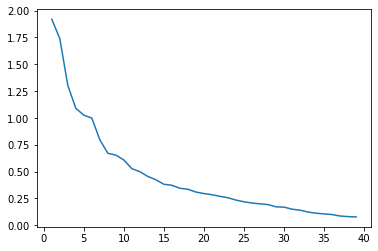

In [64]:
fa = FactorAnalyzer(n_factors=5)
x = df[sci_af_ca]
fa.fit(x)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]),ev[1:])

In [58]:
ev

array([22.10403284,  1.91866329,  1.73862431,  1.30213039,  1.08864518,
        1.02491364,  0.99794172,  0.79505169,  0.66981406,  0.65275339,
        0.60723582,  0.52633369,  0.49852547,  0.45378543,  0.42290652,
        0.38110168,  0.37154276,  0.34376175,  0.33458643,  0.30856859,
        0.29452872,  0.28383137,  0.26881799,  0.2556997 ,  0.23381163,
        0.2178675 ,  0.20616611,  0.19890125,  0.19169343,  0.17094844,
        0.16795978,  0.14895901,  0.13983216,  0.12223182,  0.11142601,
        0.10522318,  0.09886256,  0.08557006,  0.07978122,  0.07696938])

In [59]:
f[fa.loadings_.argmax(axis=1) == 1][['question', 'factor_number']]

,question,factor_number
33,29. האם התעצבנת בקלות בגלל אחרים?,4
35,30. האם איבדת שליטה על המזג שלך בקלות?,4
37,31. האם כעסת רוב הזמן?,4
39,32. האם היה לך קשה להירדם?,4


In [60]:
f[fa.loadings_.argmax(axis=1) == 2][['question', 'factor_number']]

,question,factor_number
3,4. האם הרגשת שראשך מתפוצץ מיותר מדי מחשבות?,3
12,12. האם הרגשת שמחשבותיך רצות מהר מדי?,3
23,21. האם חשת לחץ בראש מלחשוב יותר מדי?,3
25,23. האם הרגשת שראשך כואב מיותר מדי מחשבות בתוכו?,3
29,27. האם הרגשת שמחשבותיך מבולבלות?,3


In [61]:
f[fa.loadings_.argmax(axis=1) == 3][['question', 'factor_number']]

,question,factor_number
1,2. האם חשת תחושות מוזרות בגופך?,2
10,10. האם גופך או עורך הרגישו מוזר?,2
11,11. האם הרגשת שמשהו קורה לגופך?,2
28,26. האם חשבת שמשהו עלול להרוג אותך בפתאומיות כ...,2


In [62]:
f[fa.loadings_.argmax(axis=1) == 4][['question', 'factor_number']]

,question,factor_number
2,3. האם הרגשת שכואב לך כל כך עד שאינך יכול לסבו...,2
6,7. האם הרגשת שחייך בסכנה?,2
9,9. האם הרגשת שכואב לך מאוד וזה לא יכול להפסק?,2
18,17. האם הרגשת כאב שחייב להיפסק?,2
